In [2]:
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = '/kaggle/input/rice-yield/Modeling_Output - Copy.xlsx'
dfs = pd.read_excel(path, sheet_name=None) 
district = dfs.keys()
print(district)

dict_keys(['Sheet5'])


In [4]:
df = pd.concat(dfs.values(), ignore_index=True)
syn_df = pd.read_csv('/kaggle/input/syn-data/synthetic_yield.csv')

In [5]:
syn_df.describe()

,Unnamed: 0,DT,SOC,BD,CO2,GD,Tavg,Text,Rain,Srad,Etc,Yield
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,47.321800,0.749247,1.365078,405.582800,132.934700,26.427835,47.511800,410.057972,2314.040586,493.558043,5208.589000
std,2886.89568,25.932202,0.029896,0.015116,27.704395,9.021273,2.727743,28.074374,145.149516,261.940570,52.198089,987.844201
min,0.00000,-6.000000,0.716546,1.348331,375.000000,114.000000,20.697313,-16.000000,90.795745,1448.822555,303.916104,2734.000000
25%,2499.75000,21.000000,0.719498,1.350072,380.000000,126.000000,24.095716,26.000000,308.477901,2156.645203,466.003289,4339.000000
50%,4999.50000,48.000000,0.721620,1.351155,399.000000,131.000000,26.113259,44.000000,385.843939,2341.688320,509.795852,5335.500000
75%,7499.25000,73.000000,0.779268,1.380279,447.000000,139.000000,28.678449,71.000000,452.597787,2540.745875,530.392928,5966.250000
max,9999.00000,100.000000,0.782327,1.382002,456.000000,160.000000,33.958751,122.000000,840.849431,2752.747478,600.467221,7677.000000


# Missing value
No missing values

In [6]:
syn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   DT          10000 non-null  int64  
 2   SOC         10000 non-null  float64
 3   BD          10000 non-null  float64
 4   CO2         10000 non-null  int64  
 5   GD          10000 non-null  int64  
 6   Tavg        10000 non-null  float64
 7   Text        10000 non-null  int64  
 8   Rain        10000 non-null  float64
 9   Srad        10000 non-null  float64
 10  Etc         10000 non-null  float64
 11  Yield       10000 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 937.6 KB


In [7]:
df = df.drop(['Location','Year','Treatment'],axis=1)
syn_df = syn_df.drop(['Unnamed: 0'],axis=1)

In [8]:
df_combined = pd.concat([df, syn_df], ignore_index=True)

In [9]:
df_combined

,DT,SOC,BD,CO2,GD,Tavg,Text,Rain,Srad,Etc,Yield
0,10,0.720000,1.350000,380,144,23.217414,4,340.600000,2188.081553,455.213478,6213
1,24,0.720000,1.350000,380,141,23.879754,12,425.400000,2288.342379,483.109658,6306
2,41,0.720000,1.350000,380,133,24.870709,20,443.000000,2251.547822,491.408199,6166
3,55,0.720000,1.350000,380,128,25.754457,25,490.800000,2241.631835,496.316383,5200
4,72,0.720000,1.350000,380,125,26.731151,31,664.600000,2314.153415,516.570514,5441
...,...,...,...,...,...,...,...,...,...,...,...
10175,77,0.720687,1.350005,379,122,30.166966,57,773.247860,2206.397140,498.454693,5825
10176,81,0.778432,1.351016,377,125,29.972644,86,621.936226,2169.233984,531.616659,4886
10177,52,0.778853,1.380880,448,145,24.519644,41,380.333999,2627.967025,542.106935,6529
10178,78,0.720756,1.349530,399,124,26.799056,39,688.759639,2206.833077,523.777531,4287


# outlier handling

(8724, 11)


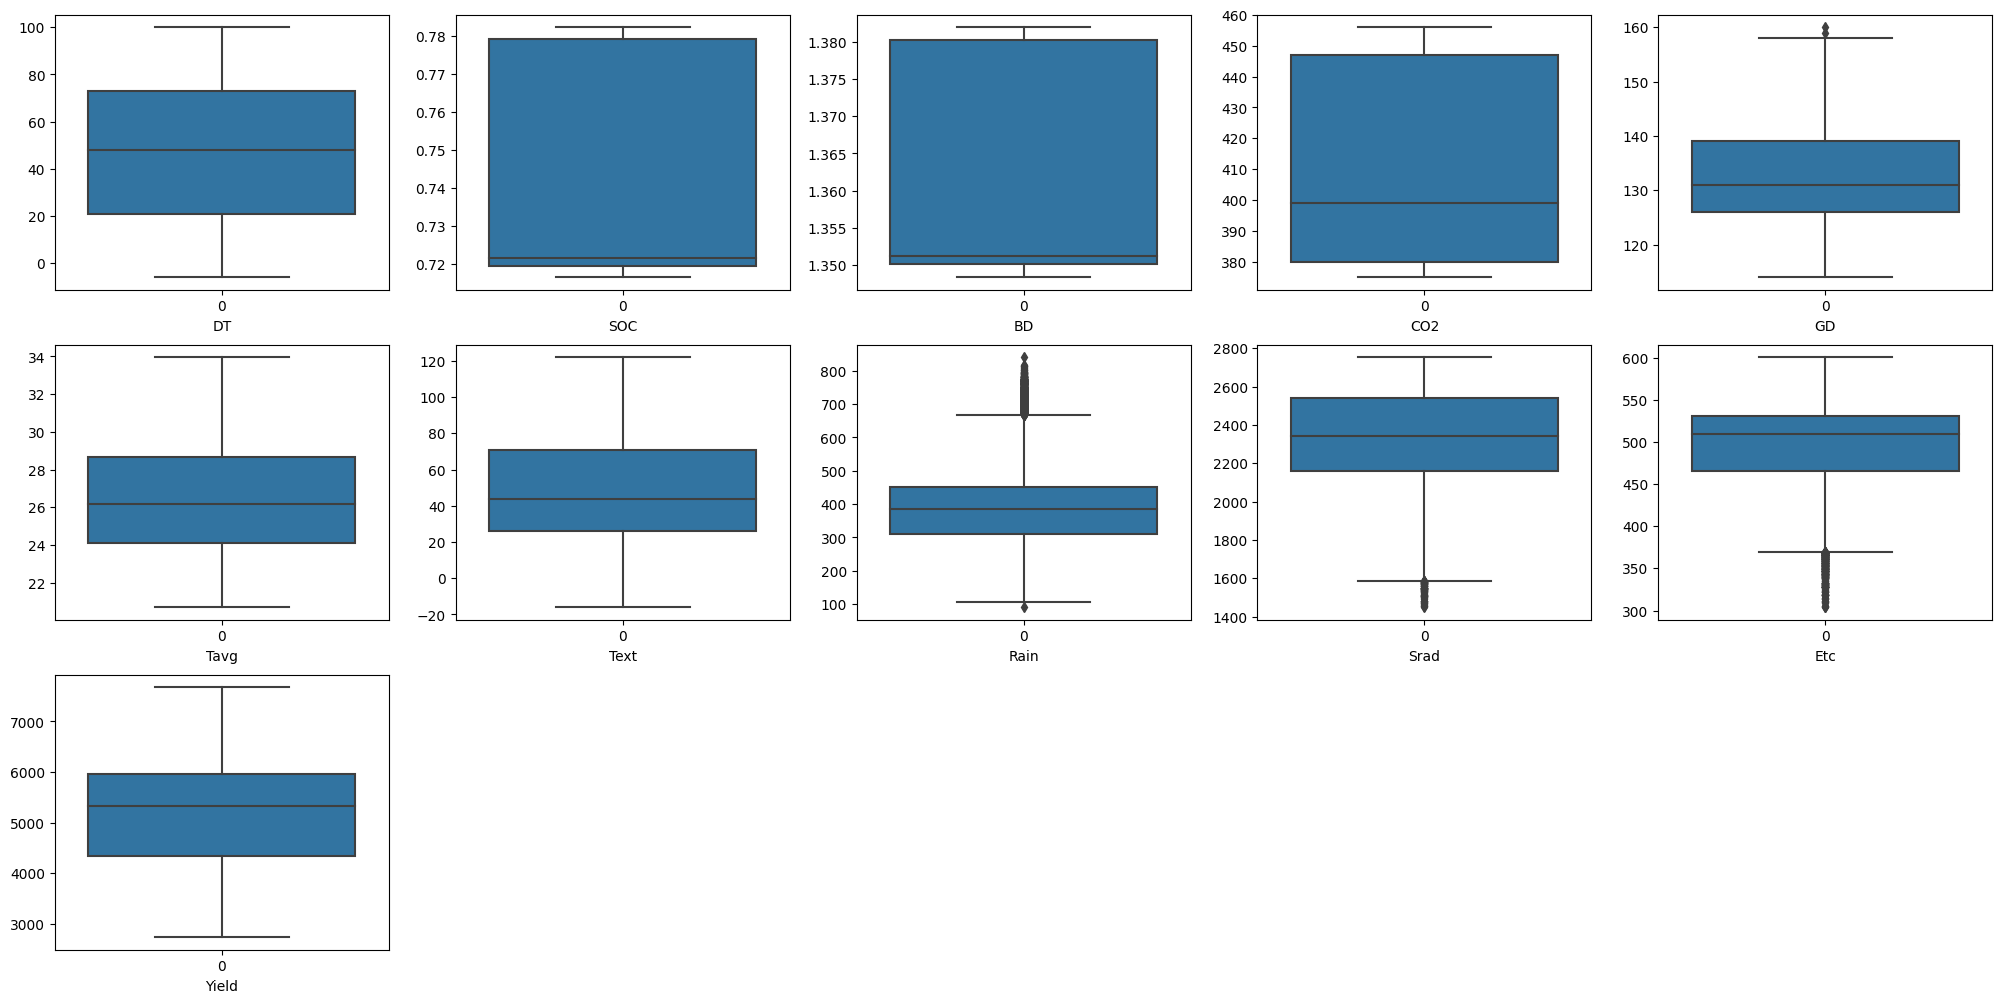

In [10]:
def outlierVisualization(dataset):
  cols = dataset.select_dtypes(include=['int64','float64']).columns
  plt.figure(figsize=(25,25))
  for i, col in enumerate(cols):
    plt.subplot(6,5,i+1)
    sns.boxplot(dataset[col])
    plt.xlabel(col)
outlierVisualization(df_combined)
Q1 = df_combined.quantile(0.25)
Q3 = df_combined.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_combined[~((df_combined < (Q1 - 1.5 * IQR)) | (df_combined > (Q3 + 1.5 * IQR))).any(axis=1)]
df_combined = df_cleaned
print(df_combined.shape)

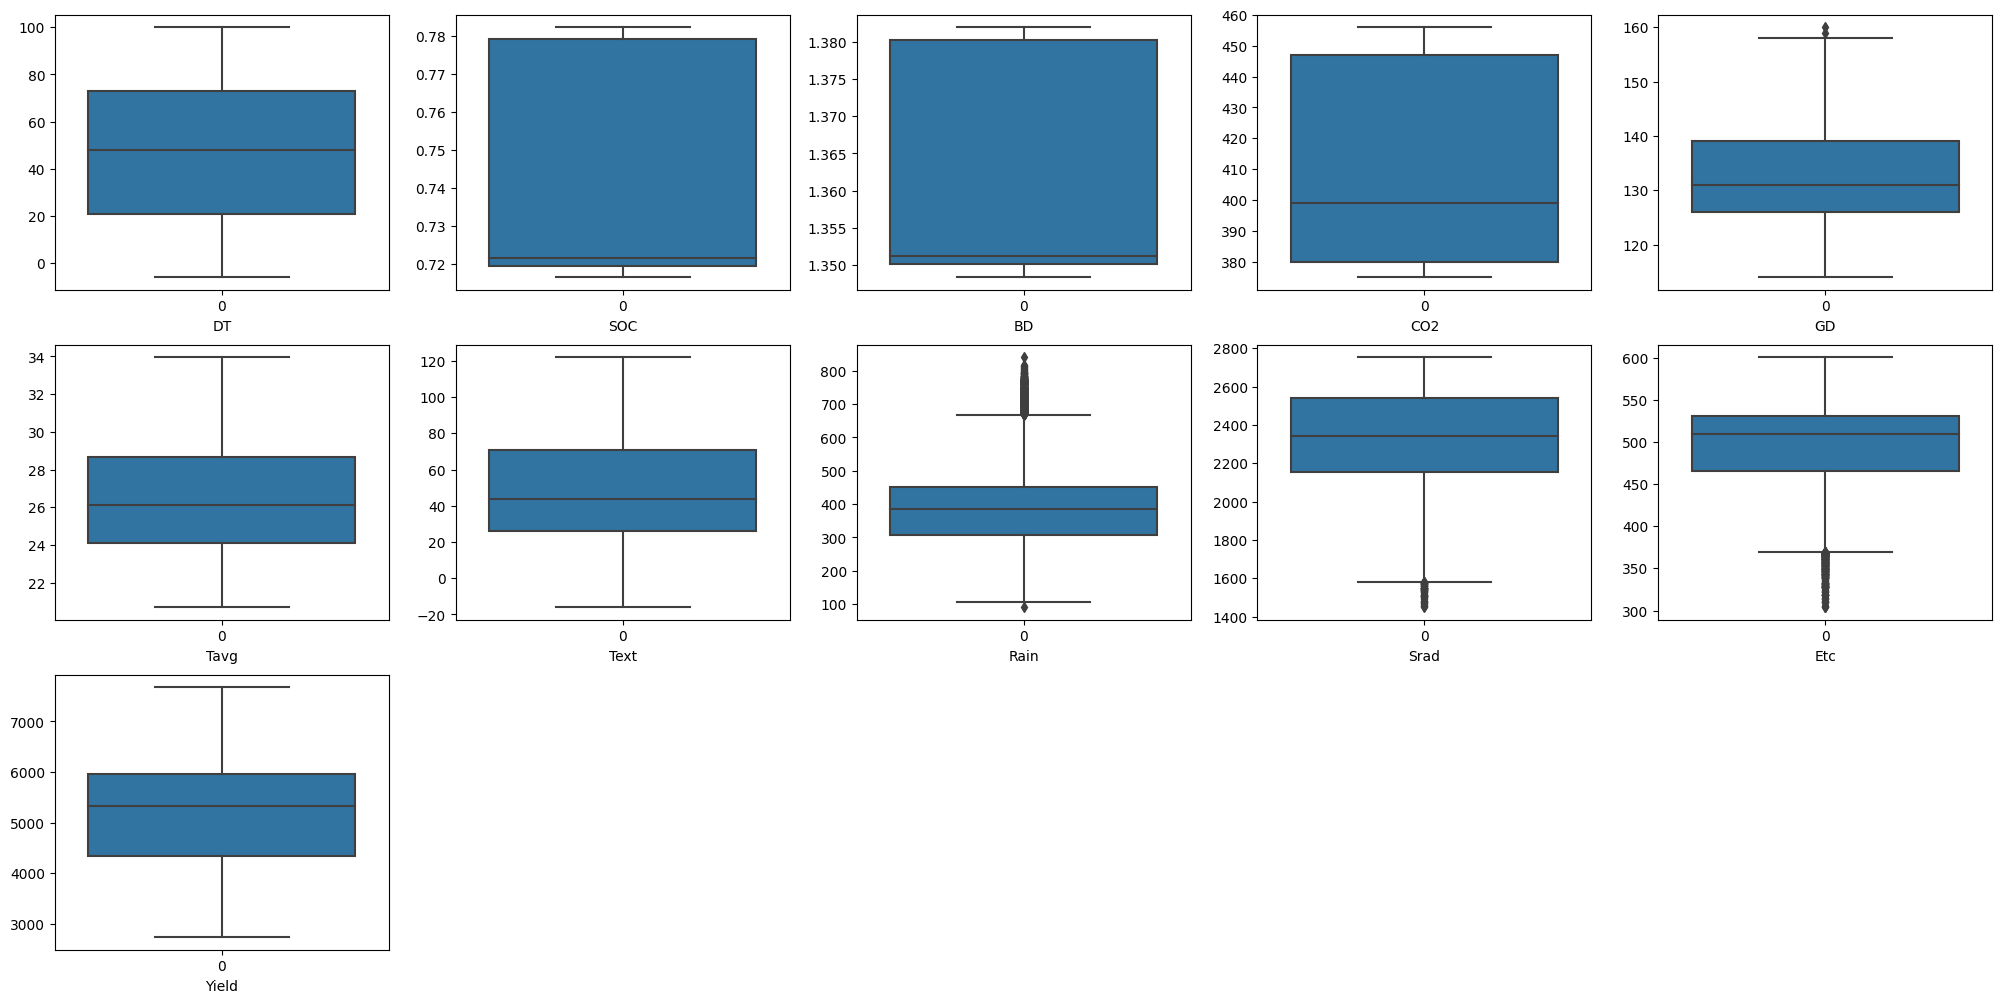

In [11]:
outlierVisualization(syn_df)
Q1 = syn_df.quantile(0.25)
Q3 = syn_df.quantile(0.75)
IQR = Q3 - Q1
syn_df = syn_df[~((syn_df < (Q1 - 1.5 * IQR)) | (syn_df > (Q3 + 1.5 * IQR))).any(axis=1)]

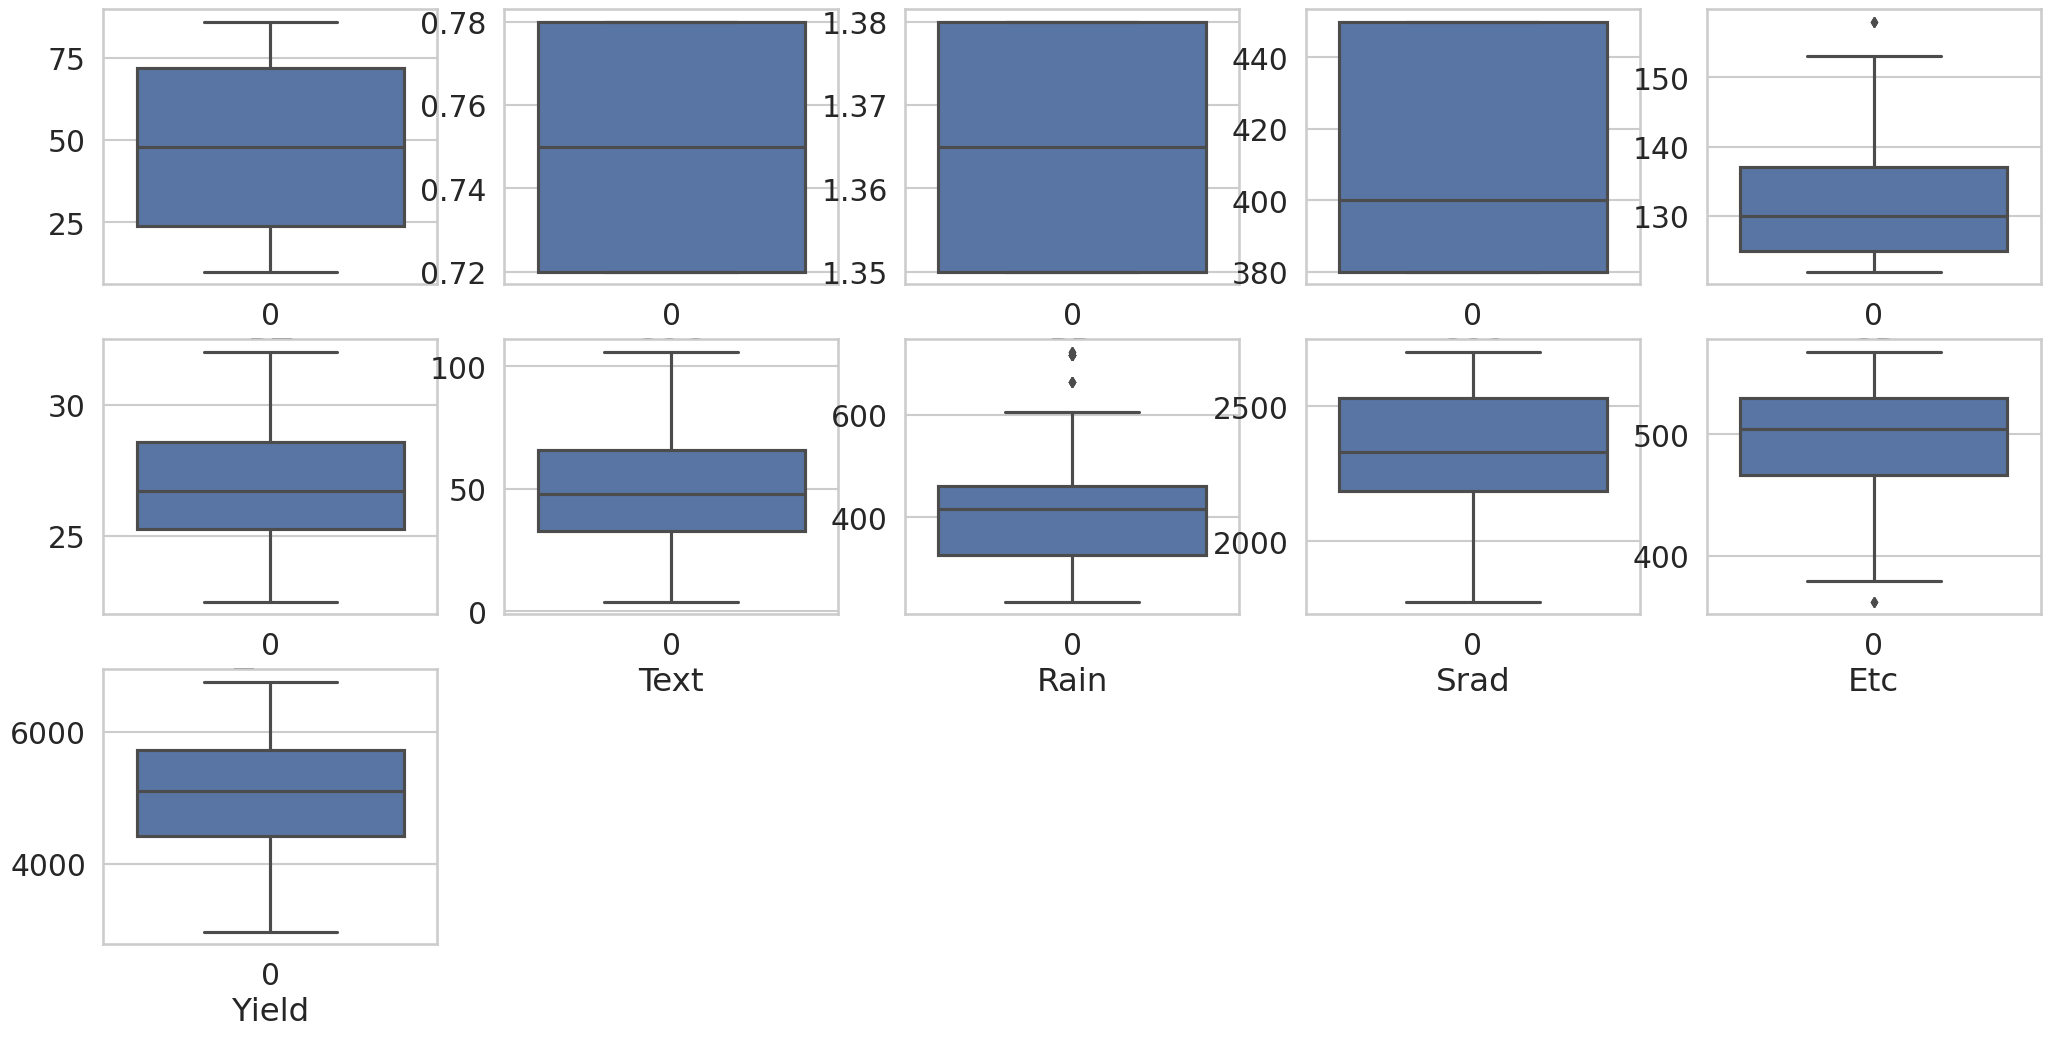

In [221]:
outlierVisualization(df)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [222]:
df

,DT,SOC,BD,CO2,GD,Tavg,Text,Rain,Srad,Etc,Yield
0,10,0.72,1.35,380,144,23.217414,4,340.6,2188.081553,455.213478,6213
1,24,0.72,1.35,380,141,23.879754,12,425.4,2288.342379,483.109658,6306
2,41,0.72,1.35,380,133,24.870709,20,443.0,2251.547822,491.408199,6166
3,55,0.72,1.35,380,128,25.754457,25,490.8,2241.631835,496.316383,5200
6,10,0.72,1.35,380,138,23.984712,12,331.0,2056.426697,422.489282,5506
...,...,...,...,...,...,...,...,...,...,...,...
175,24,0.78,1.38,450,136,26.252555,51,244.0,2337.021554,462.409054,5351
176,41,0.78,1.38,450,134,27.882593,65,307.0,2436.695715,496.370882,5141
177,55,0.78,1.38,450,131,29.150000,75,361.0,2458.153210,510.557080,4706
178,72,0.78,1.38,450,130,30.581298,90,416.0,2534.908247,537.735290,3751


In [12]:
df_combined['Yield']=df_combined['Yield']/1000

## Normalization

In [14]:
df_combined.columns

Index(['DT', 'SOC', 'BD', 'CO2', 'GD', 'Tavg', 'Text', 'Rain', 'Srad', 'Etc',
       'Yield'],
      dtype='object')

In [15]:
df_combined = df_combined.drop(['BD','Text'],axis=1)

In [16]:
#col = ['DT', 'SOC', 'BD', 'CO2', 'GD', 'Tavg', 'Text', 'Rain', 'Srad', 'Etc']
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer() # also standardScaler included
transformed = pt.fit_transform(df_combined)
df_transformed = pd.DataFrame(transformed, columns = df_combined.columns)

In [86]:
sns.set_context("talk", font_scale=1.5)

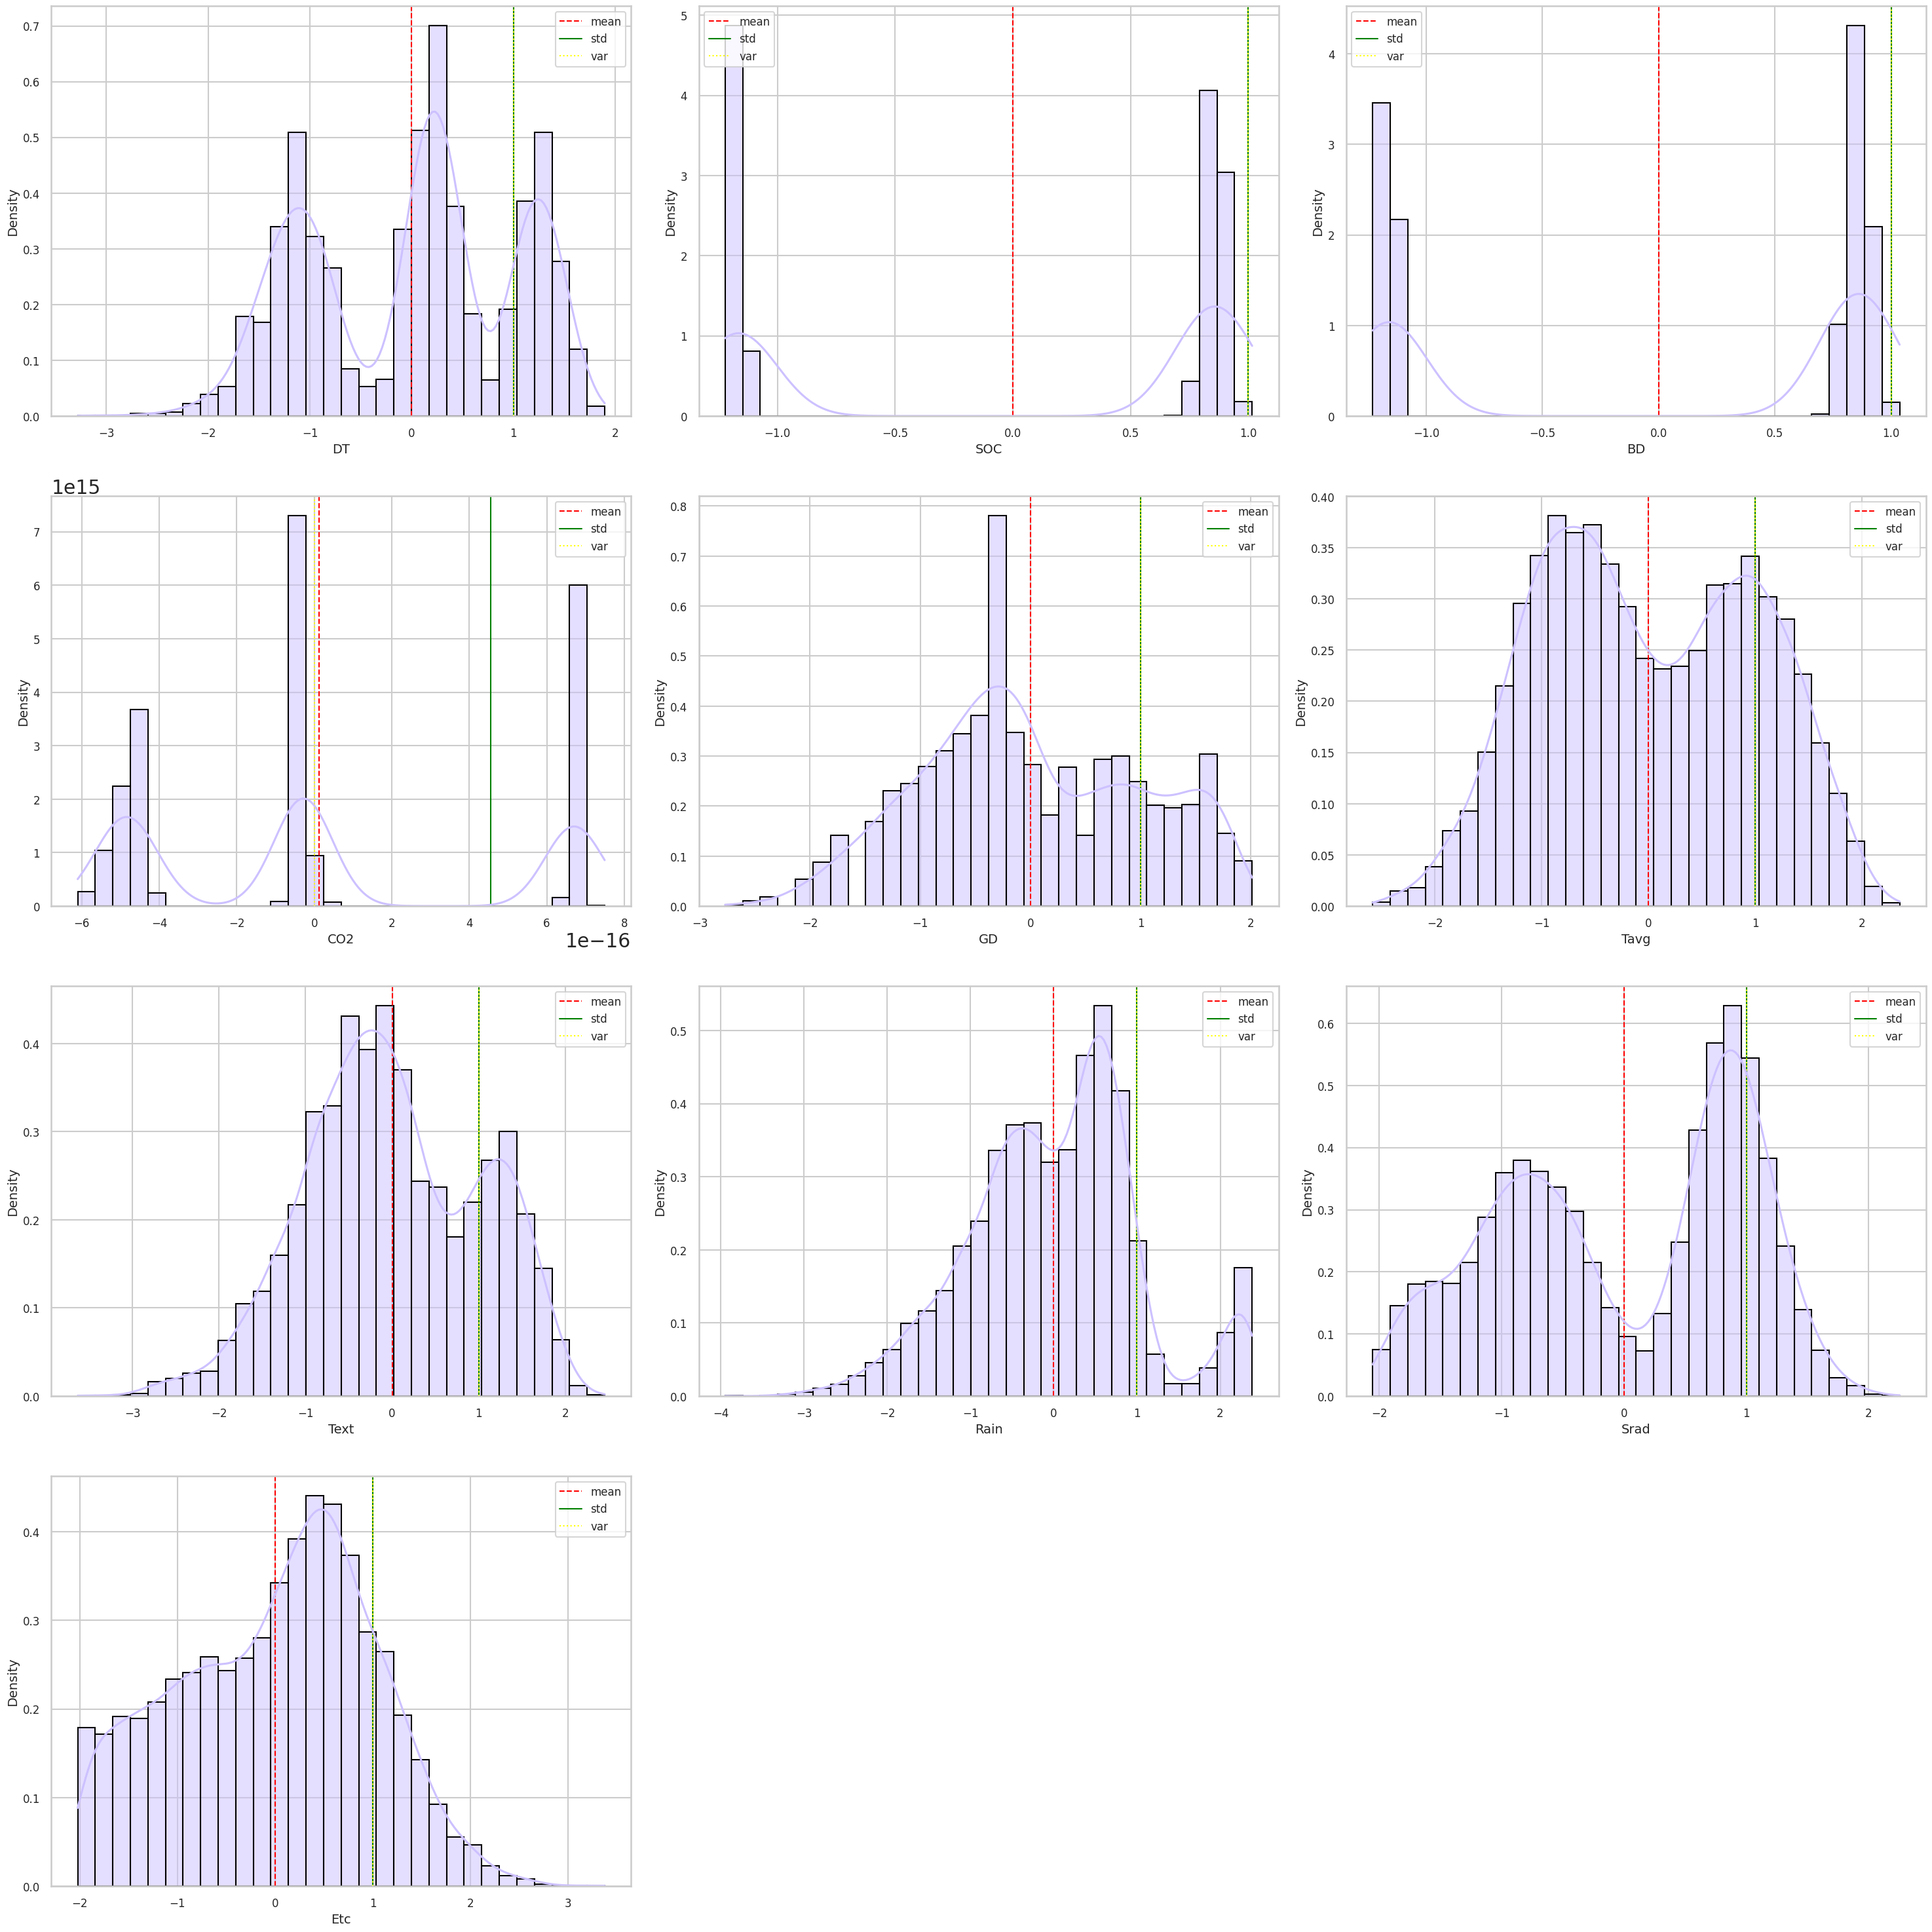

In [87]:
sns.set_theme(style="whitegrid")
sns.set_context("talk", font_scale=1.3) 
plt.figure(figsize=(30,30))
for i, col in enumerate(df_transformed.columns):
  plt.subplot(4,3,i+1)
  mean = df_transformed[col].mean()
  plt.axvline(mean, color='red', linestyle='--', linewidth=1.5,label='mean')
  std = df_transformed[col].std()
  plt.axvline(std, color='green', linestyle='-', linewidth=1.5,label='std')
  var = df_transformed[col].var()

  plt.axvline(var, color='yellow', linestyle=':', linewidth=1.5,label='var')
  sns.histplot(df_transformed[col],stat='density',kde=True,bins=30,color = '#CDC1FF',edgecolor='#000000')
  plt.xlabel(col, fontsize=14)
  plt.ylabel('Density', fontsize=14)
    
    # Tick labels
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
    
    # Legend with larger font
  plt.legend(fontsize=12)
plt.tight_layout()
#plt.savefig('data_distrib_yield.pdf',dpi=600)

## Feature Selection

<Axes: >

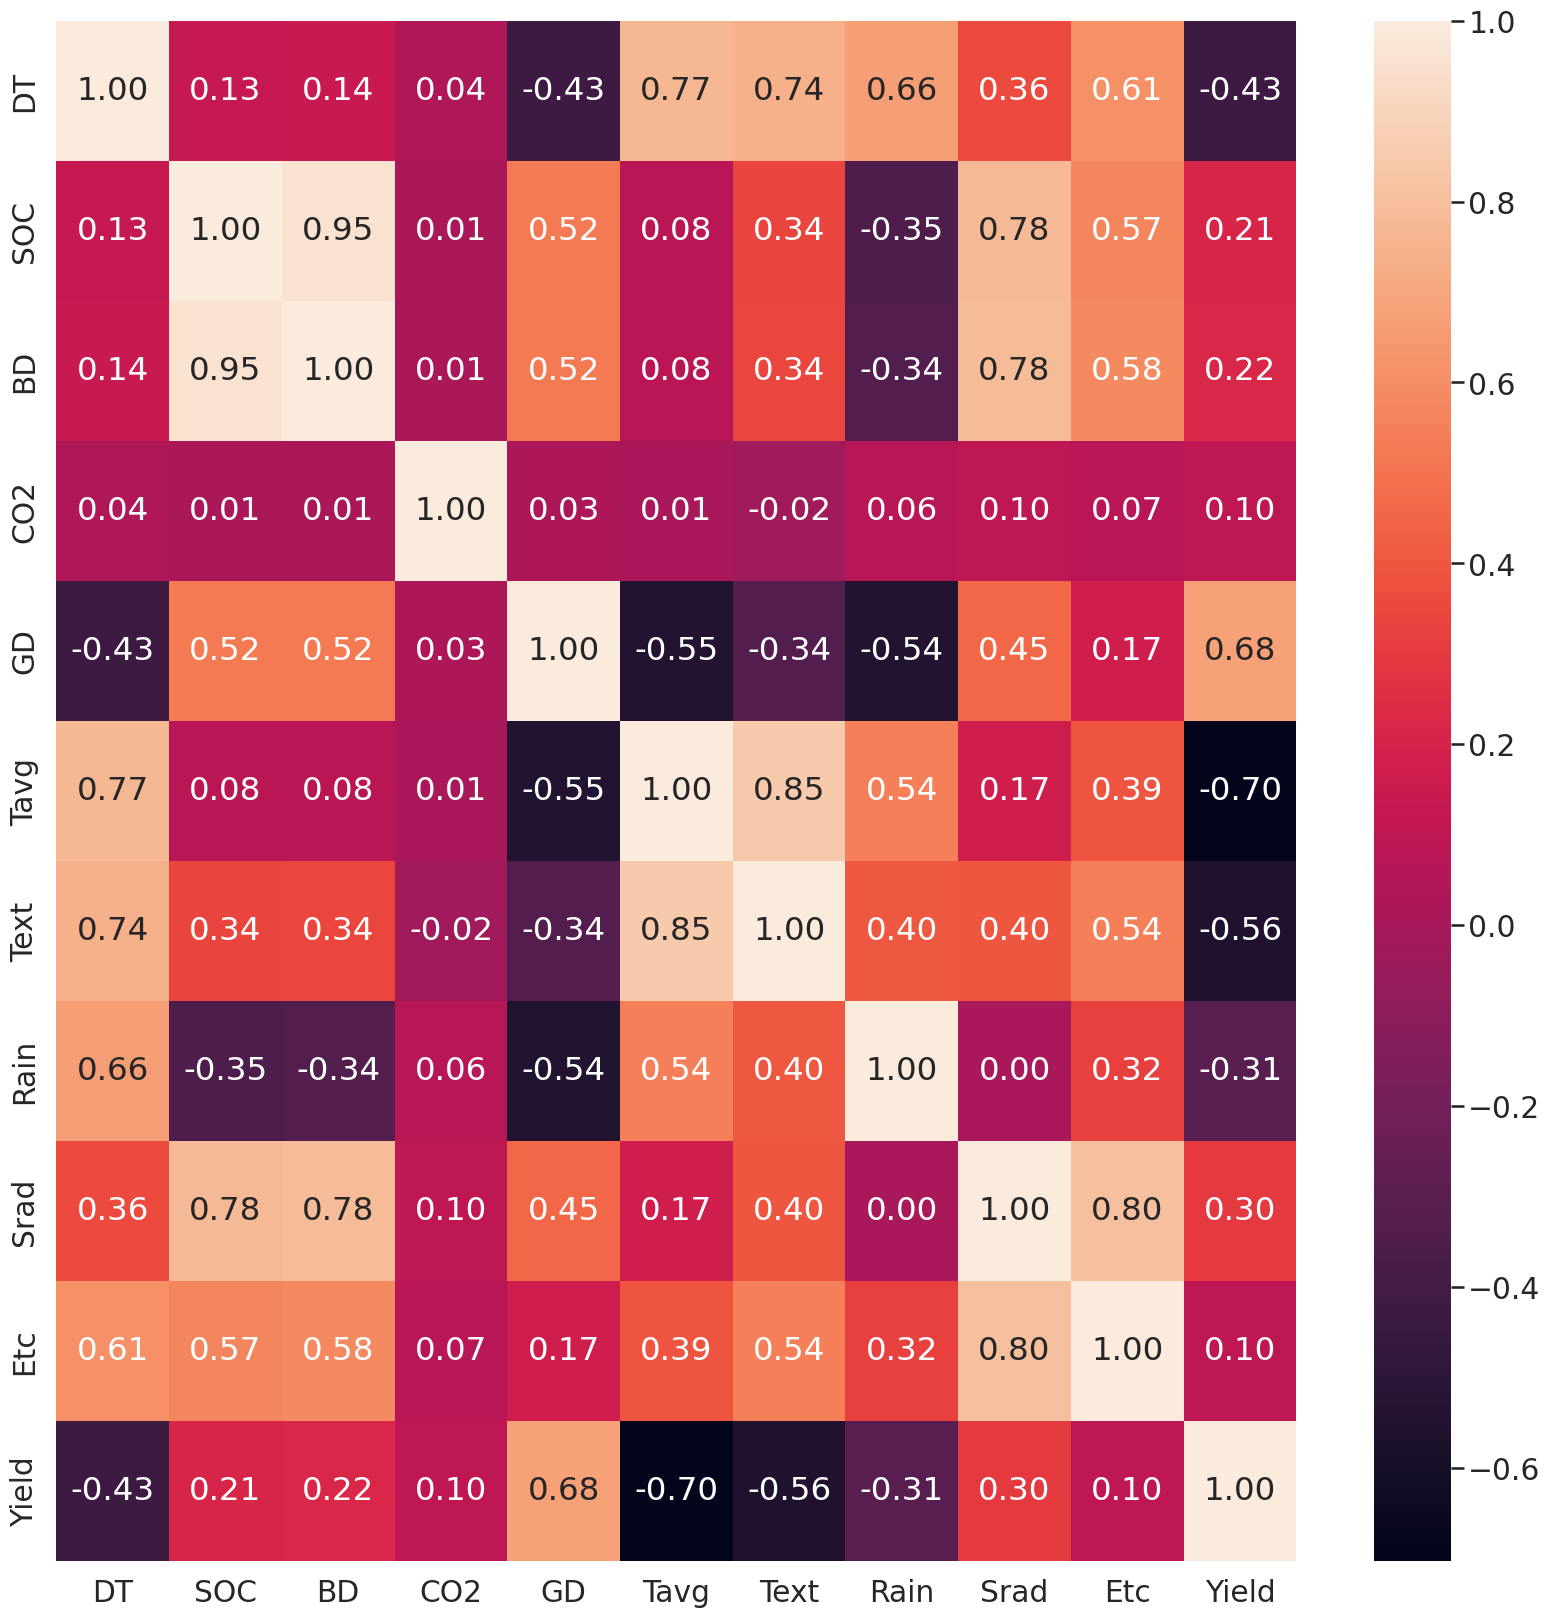

In [79]:
plt.figure(figsize=(20,20))
sns.heatmap(df_combined.corr(),annot=True,fmt='.2f')

In [225]:
df_transformed = df_combined

## Model Train

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset,TensorDataset, DataLoader,random_split
import time
import itertools

In [18]:
X = df_transformed.drop(['Yield'],axis=1)
y = df_transformed['Yield']

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X = torch.tensor(X.to_numpy().astype(dtype=np.float32)).to(device)
y = torch.tensor(y.to_numpy().astype(dtype=np.float32)).to(device)
dataset = TensorDataset(X, y)
BATCH_SIZE = 16
TRAIN_SIZE = int(0.8*len(dataset))
TEST_SIZE = len(dataset)-TRAIN_SIZE

train_data, test_data = random_split(dataset,[TRAIN_SIZE,TEST_SIZE],generator=torch.manual_seed(42))
trainLoader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
testLoader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [20]:
class Tokenize(nn.Module):
    def __init__(self,input_features,embed_size=32):
        super(Tokenize,self).__init__()
        self.embed_size = embed_size
        self.embedding = nn.Linear(input_features,4*embed_size)
    def forward(self,x): 
        x = x.unsqueeze(1)
        x = self.embedding(x)
        x = x.reshape(x.shape[0],4,self.embed_size)
        return x
class Embeddings(nn.Module):
    def __init__(self,input_features,embed_size=32):
        super(Embeddings,self).__init__()
        self.tokenize = Tokenize(input_features,embed_size)
        self.pose = nn.Parameter(data=torch.randn(1,4,embed_size),requires_grad=True)
    def forward(self,x):
        x = self.tokenize(x)
        return self.pose + x
        
class Residual(nn.Module):
    def __init__(self,input_shape,hid_size):
        super(Residual,self).__init__()
        self.lstm = nn.LSTM(input_size=input_shape,hidden_size=hid_size,batch_first=True)
        self.linear = nn.Linear(input_shape,hid_size)
        self.norm = nn.LayerNorm(hid_size)
    def forward(self,x):
        lstm_out,_= self.lstm(x)
        linear_out = self.linear(x)
        return  self.norm(lstm_out + linear_out)
class ResidualLSTM(nn.Module):
    def __init__(self,input_shape,hid_size):
        super(ResidualLSTM,self).__init__()
        self.embedding = Embeddings(input_shape,hid_size)
        self.residual = Residual(hid_size,2*hid_size)
        self.lstm = nn.LSTM(input_size=2*hid_size,hidden_size=hid_size,batch_first=True)
        self.linear = nn.Linear(hid_size*4,1)
    def forward(self,x):
        x = self.embedding(x)
        x = self.residual(x)
        x,_ = self.lstm(x)
        x = x.reshape(x.shape[0],-1)
        x = self.linear(x)
        return x

In [21]:
import random

In [31]:
def train_model_generalized(model, trainLoader, optimizer, criterion, feature_indices, min_features=1):
    losses = []
    model.train()
    for x, label in trainLoader:
        #Random subset size
        r = random.randint(min_features, len(feature_indices))
        active_features = sorted(random.sample(feature_indices, r))
        
        # Create masked input
        newX = torch.zeros_like(x).to(device)
        newX[:, active_features] = x[:, active_features]
        
        out = model(newX)
        loss = criterion(out.squeeze(), label)
        losses.append(loss.cpu().detach().numpy())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return np.mean(losses)


def test_model(model,testLoader,criterion,indx):
    losses = []
    model.eval()
    for x_test,y_test in testLoader:
        with torch.inference_mode():
            subset = x_test[:,indx]
            newX = torch.zeros_like(x_test).to(device)
            newX[:,indx] = subset
            out = model(newX)
            loss = criterion(out.squeeze(),y_test)
            losses.append(loss.cpu().detach().numpy())
    return np.mean(losses)
def plot_graph(loss, test_loss):
    plt.figure(figsize=(10, 10))
    plt.plot(loss, c='r', label='train_loss')
    plt.plot(test_loss, c='b', label='test_loss')
    plt.xlabel('epoch')  
    plt.ylabel('loss')   
    plt.legend()

In [251]:
!pip install optuna

In [258]:
import optuna
import gc

In [270]:
def train_model(model,data,fn,optimizer,device):
    model.train()
    for x, y in data:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(x)
        loss = fn(outputs.squeeze(), y)
        loss.backward()
        optimizer.step()
def evaluate(model,data,fn,device):
    model.eval()
    losses = []
    with torch.no_grad():
        for x, y in data:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            loss = fn(outputs.squeeze(),y)
            losses.append(loss.cpu().detach().numpy())
    return np.mean(losses)
    

In [273]:
def objective(trial):
    try:
        batch_size = trial.suggest_categorical("batch", [16, 32, 64,128,256])
        learning_rate = trial.suggest_loguniform("lr", 1e-7, 1e-2)
        optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "AdamW","Adamax","SGD","RMSprop"])
        weight_decay = trial.suggest_loguniform("w_dec", 1e-6, 1e-3)

        train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(test_data, batch_size=batch_size)

        model = ResidualLSTM(8,32).to(device)
        criterion = nn.MSELoss()
        optimizer = getattr(torch.optim, optimizer_name)(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

        for epoch in range(15):  # Or use trial.suggest_int("epochs", 10, 30)
            train_model(model, train_loader, criterion, optimizer, device)
            val_loss = evaluate(model, val_loader, criterion, device)
            trial.report(val_loss, epoch)
    except RuntimeError as e:
        if "out of memory" in str(e):
            torch.cuda.empty_cache()
            gc.collect()
            raise optuna.exceptions.TrialPruned()
        raise
    return val_loss

In [274]:
from optuna.samplers import TPESampler
from optuna.pruners import MedianPruner

study = optuna.create_study(
    direction="minimize",
    sampler=TPESampler(seed=42),
    pruner=MedianPruner(n_startup_trials=5, n_warmup_steps=5)
)

study.optimize(objective, n_trials=30)

[I 2025-05-08 19:17:07,422] A new study created in memory with name: no-name-92b4ec8d-3a14-4b6d-ae41-5a9c42f33239
[I 2025-05-08 19:17:20,200] Trial 0 finished with value: 0.9361914992332458 and parameters: {'batch': 32, 'lr': 6.025215736203855e-07, 'optimizer': 'AdamW', 'w_dec': 0.0008123245085588687}. Best is trial 0 with value: 0.9361914992332458.
[I 2025-05-08 19:17:44,429] Trial 1 finished with value: 0.25377658009529114 and parameters: {'batch': 16, 'lr': 4.205156450913872e-05, 'optimizer': 'Adamax', 'w_dec': 1.2562773503807034e-05}. Best is trial 1 with value: 0.25377658009529114.
[I 2025-05-08 19:17:57,122] Trial 2 finished with value: 1.0038127899169922 and parameters: {'batch': 32, 'lr': 1.7070728830306638e-07, 'optimizer': 'RMSprop', 'w_dec': 0.0002661901888489054}. Best is trial 1 with value: 0.25377658009529114.
[I 2025-05-08 19:18:03,987] Trial 3 finished with value: 0.2654660642147064 and parameters: {'batch': 64, 'lr': 2.9914693021302195e-05, 'optimizer': 'AdamW', 'w_dec

In [276]:
study.best_params

{'batch': 16,
 'lr': 0.000436811586264484,
 'optimizer': 'AdamW',
 'w_dec': 0.0006407455936233505}

In [44]:
model = ResidualLSTM(8,32).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.000437,weight_decay=0.00641)
EPOCHS = 100
feature_indices = list(range(X.shape[1]))

In [43]:
#model.load_state_dict(torch.load('/kaggle/input/reslstmwithsixfeature/pytorch/default/1/MLRR00398B32MSE009 (1).pth'))

In [27]:
model.embedding = Embeddings(X.shape[1],32).to(device)

In [45]:
def feature_names(index):
    cols = ['DT', 'SOC', 'BD', 'CO2', 'GD', 'Tavg', 'Text', 'Rain', 'Srad', 'Etc']
    selected_feature = []
    for i in index:
        selected_feature.append(cols[i])
    return selected_feature

In [46]:
best_model = None
best_loss = 10
best_iter = -1

In [47]:
import time
import copy

In [48]:
# Iterate over all feature combinations
train_losses = []
test_losses = []
start_time = time.time()
for epoch in range(EPOCHS):
    loss = train_model_generalized(model,trainLoader,optimizer,criterion,feature_indices)
    print(f"Epoch {epoch+1}, Loss: {loss}")
    train_losses.append(loss)
    #for r in range(1, 6):
    #    for subset in itertools.combinations(feature_indices, r):
    test_loss = test_model(model, testLoader, criterion,feature_indices )
    if(test_loss<best_loss):
        best_model = copy.deepcopy(model)
        best_loss = test_loss
        best_iter = epoch
    print(f'Subset {feature_names(feature_indices)}, Test Loss: {test_loss}')
    test_losses.append(test_loss)
print(f'Total time: {(time.time()-start_time)/60} mins')

Epoch 1, Loss: 0.5704114437103271
Subset ['DT', 'SOC', 'BD', 'CO2', 'GD', 'Tavg', 'Text', 'Rain'], Test Loss: 0.31389954686164856
Epoch 2, Loss: 0.5351464748382568
Subset ['DT', 'SOC', 'BD', 'CO2', 'GD', 'Tavg', 'Text', 'Rain'], Test Loss: 0.3022592067718506
Epoch 3, Loss: 0.5221604108810425
Subset ['DT', 'SOC', 'BD', 'CO2', 'GD', 'Tavg', 'Text', 'Rain'], Test Loss: 0.306510865688324
Epoch 4, Loss: 0.522633969783783
Subset ['DT', 'SOC', 'BD', 'CO2', 'GD', 'Tavg', 'Text', 'Rain'], Test Loss: 0.290526419878006
Epoch 5, Loss: 0.5148273706436157
Subset ['DT', 'SOC', 'BD', 'CO2', 'GD', 'Tavg', 'Text', 'Rain'], Test Loss: 0.28068727254867554
Epoch 6, Loss: 0.5212640762329102
Subset ['DT', 'SOC', 'BD', 'CO2', 'GD', 'Tavg', 'Text', 'Rain'], Test Loss: 0.29704776406288147
Epoch 7, Loss: 0.5443017482757568
Subset ['DT', 'SOC', 'BD', 'CO2', 'GD', 'Tavg', 'Text', 'Rain'], Test Loss: 0.2999487519264221
Epoch 8, Loss: 0.49291685223579407
Subset ['DT', 'SOC', 'BD', 'CO2', 'GD', 'Tavg', 'Text', 'Rain'

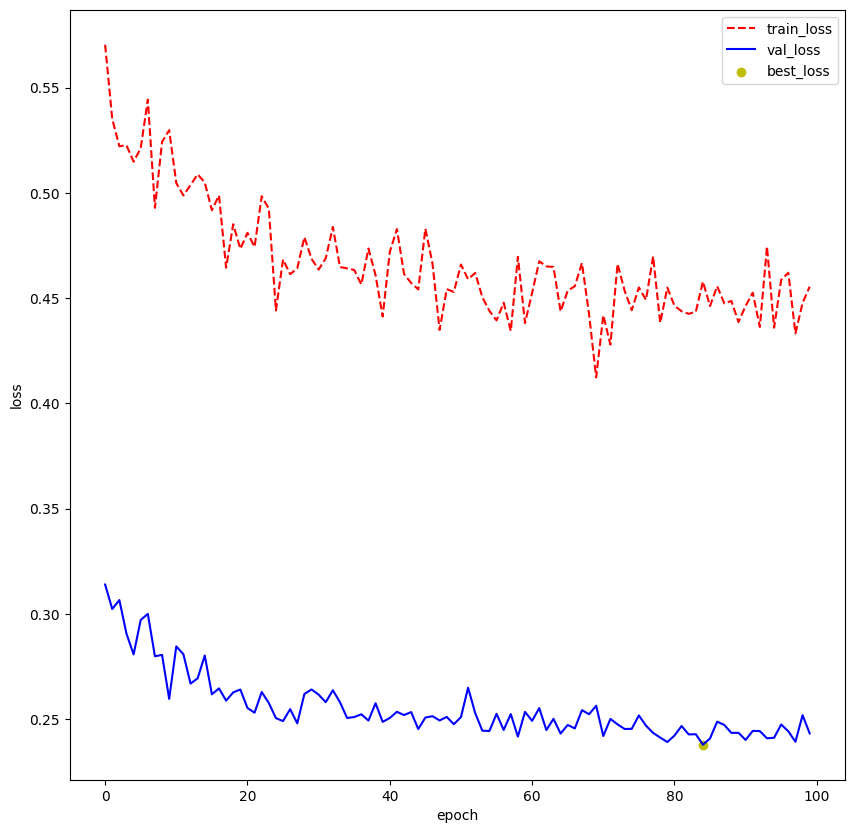

In [49]:
plt.figure(figsize=(10, 10))
plt.plot(train_losses, c='r', linestyle='--', label='train_loss')
plt.plot(test_losses, c='b', label='val_loss')
plt.scatter(best_iter,best_loss,c='y',label='best_loss')
plt.xlabel('epoch')  
plt.ylabel('loss')   
plt.legend()
plt.savefig('yieldloss.pdf',dpi=600)

In [314]:
print(sum(p.numel() for p in model.parameters())/1e3, 'K parameters')

41.281 K parameters


In [50]:
y_test = []
x_test = []
y_pred = []
for x,label in testLoader:
    pred = best_model(x)
    x_test.append(x.cpu().detach().numpy())
    y_test.append(label.cpu().detach().numpy())
    y_pred.append(pred.cpu().detach().numpy())
y_pred = np.concatenate(y_pred, axis=0 )
y_test = np.concatenate( y_test, axis=0 )
x_test = np.concatenate( x_test, axis=0 )

In [51]:
merged = np.concatenate([x_test, y_pred], axis=1)

In [52]:
merged_trans = pt.inverse_transform(merged)

In [53]:
y_pred = merged_trans[:,-1]

In [54]:
merged = np.concatenate([x_test,y_test.reshape(y_test.shape[0],1)],axis=1)
merged_trans = pt.inverse_transform(merged)
y_test = merged_trans[:,-1]

In [55]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,mean_squared_log_error,mean_absolute_percentage_error,explained_variance_score
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
msle = mean_squared_log_error(y_test, y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)
print(f"r2 score:{r2}")
print(f"mse:{mse}")
print(f"mae:{mae}")
print(f"rmse:{rmse}")
print(f"msle:{msle}")
print(f"rmsle:{rmsle}")
print(f"mape:{mape}")
print(f"ev:{ev}")

r2 score:0.7596120184163797
mse:0.24294966459274292
mae:0.3836061656475067
rmse:0.49289923906326294
msle:0.007027913350611925
rmsle:0.08383265137672424
mape:0.07783381640911102
ev:0.760209321975708


In [343]:
mae/np.mean(y_test)

0.071605854

In [345]:
mse/np.mean(y_test)

45.57183

In [346]:
rmse/(y_test.max()-y_test.min())

0.104962625